# Desafio Inferência

##### Objetivos:
1) Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006?

2) Hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população?

## 1) Tratamento de dados

### 1.1) Importação bibliotecas e Limpeza dos dados

In [1]:
import warnings # biblioteca de avisos de atualização 
warnings.filterwarnings("ignore") # filtro para ignorar avisos
import pandas as pd # biblioteca manipulação e analise de dados
import numpy as np # biblioteca de funcoes matematicas
import seaborn as sns # visualização dados
import matplotlib.pyplot as plt #visualizaçao dados
from scipy.stats import f_oneway # ANOVA teste F
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# Leitura do arquivo

df_phq = pd.read_csv('dados/DEMO_PHQ.csv')
df_pag_hei = pd.read_csv('dados/PAG_HEI.csv')

In [3]:
# Informações gerais sobre os dados

df_phq.info() #5334 observações de adultos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5334 non-null   int64  
 1   DPQ010    4836 non-null   float64
 2   DPQ020    4836 non-null   float64
 3   DPQ030    4836 non-null   float64
 4   DPQ040    4836 non-null   float64
 5   DPQ050    4836 non-null   float64
 6   DPQ060    4836 non-null   float64
 7   DPQ070    4836 non-null   float64
 8   DPQ080    4836 non-null   float64
 9   DPQ090    4836 non-null   float64
 10  RIAGENDR  5334 non-null   int64  
 11  RIDAGEYR  5334 non-null   int64  
 12  RIDRETH1  5334 non-null   int64  
 13  DMDEDUC   5334 non-null   int64  
 14  INDFMINC  5287 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 625.2 KB


In [4]:
df_pag_hei.info() # 9424 observações de crianças e adultos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      9424 non-null   int64  
 1   PAG_MINW                  7150 non-null   float64
 2   ADHERENCE                 7150 non-null   float64
 3   HEI2015C1_TOTALVEG        8549 non-null   float64
 4   HEI2015C2_GREEN_AND_BEAN  8549 non-null   float64
 5   HEI2015C3_TOTALFRUIT      8549 non-null   float64
 6   HEI2015C4_WHOLEFRUIT      8549 non-null   float64
 7   HEI2015C5_WHOLEGRAIN      8549 non-null   float64
 8   HEI2015C6_TOTALDAIRY      8549 non-null   float64
 9   HEI2015C7_TOTPROT         8549 non-null   float64
 10  HEI2015C8_SEAPLANT_PROT   8549 non-null   float64
 11  HEI2015C9_FATTYACID       8549 non-null   float64
 12  HEI2015C10_SODIUM         8549 non-null   float64
 13  HEI2015C11_REFINEDGRAIN   8549 non-null   float64
 14  HEI2015C

In [5]:
# Unindo os dois df pela variavel seqn

db_merge = pd.merge(df_phq,df_pag_hei, how='left', on = ['SEQN'])

In [6]:
db_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SEQN                      5334 non-null   int64  
 1   DPQ010                    4836 non-null   float64
 2   DPQ020                    4836 non-null   float64
 3   DPQ030                    4836 non-null   float64
 4   DPQ040                    4836 non-null   float64
 5   DPQ050                    4836 non-null   float64
 6   DPQ060                    4836 non-null   float64
 7   DPQ070                    4836 non-null   float64
 8   DPQ080                    4836 non-null   float64
 9   DPQ090                    4836 non-null   float64
 10  RIAGENDR                  5334 non-null   int64  
 11  RIDAGEYR                  5334 non-null   int64  
 12  RIDRETH1                  5334 non-null   int64  
 13  DMDEDUC                   5334 non-null   int64  
 14  INDFMINC

In [7]:
# Renomeando as colunas para maior interpretabilidade dos dados

db_merge.columns = ['seqn','dpq010','dpq020','dpq030', 'dpq040','dpq050', 'dpq060', 'dpq070', 'dpq080', 'dpq090','genero','idade','raça_etnia','escolaridade','renda_familiar_anual','aerobico_min','aderencia','vegetais_total','verduras_verde_escuras_leguminosas','frutais_total','frutas_in_natura','graos_integrais','laticinios','proteinas_total','proteinas_vegetais','acido_graxo','sodio', 'graos_refinados','gordura_saturada','açucar_adicional','escore_total']

In [8]:
# datasets unidos

db_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5334 entries, 0 to 5333
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   seqn                                5334 non-null   int64  
 1   dpq010                              4836 non-null   float64
 2   dpq020                              4836 non-null   float64
 3   dpq030                              4836 non-null   float64
 4   dpq040                              4836 non-null   float64
 5   dpq050                              4836 non-null   float64
 6   dpq060                              4836 non-null   float64
 7   dpq070                              4836 non-null   float64
 8   dpq080                              4836 non-null   float64
 9   dpq090                              4836 non-null   float64
 10  genero                              5334 non-null   int64  
 11  idade                               5334 no

### 1.2) Tratamento das Variáveis

In [9]:
# Verificando a quantidade de valores faltantes

db_merge.isna().sum()

seqn                                    0
dpq010                                498
dpq020                                498
dpq030                                498
dpq040                                498
dpq050                                498
dpq060                                498
dpq070                                498
dpq080                                498
dpq090                                498
genero                                  0
idade                                   0
raça_etnia                              0
escolaridade                            0
renda_familiar_anual                   47
aerobico_min                            0
aderencia                               0
vegetais_total                        274
verduras_verde_escuras_leguminosas    274
frutais_total                         274
frutas_in_natura                      274
graos_integrais                       274
laticinios                            274
proteinas_total                   

In [10]:
# Calculando a porcentagem da media de valores nulos por linha
# Como para todas as variáveis o valor foi menos que 10%, optei por não tratar os valores nulos

db_merge.isna().mean(axis=0)* 100

seqn                                  0.000000
dpq010                                9.336333
dpq020                                9.336333
dpq030                                9.336333
dpq040                                9.336333
dpq050                                9.336333
dpq060                                9.336333
dpq070                                9.336333
dpq080                                9.336333
dpq090                                9.336333
genero                                0.000000
idade                                 0.000000
raça_etnia                            0.000000
escolaridade                          0.000000
renda_familiar_anual                  0.881140
aerobico_min                          0.000000
aderencia                             0.000000
vegetais_total                        5.136858
verduras_verde_escuras_leguminosas    5.136858
frutais_total                         5.136858
frutas_in_natura                      5.136858
graos_integra

In [11]:
# Avaliando frequencia das variaveis quantitativas do dpq(Questionário de Sintomas de Depressão)

db_merge[[
"dpq010",
"dpq020",
"dpq030",
"dpq040",
"dpq050",
"dpq060",
"dpq070",
"dpq080",
"dpq090"]].agg(['value_counts'])

,dpq010,dpq020,dpq030,dpq040,dpq050,dpq060,dpq070,dpq080,dpq090
,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts,value_counts
0.0,3850,3769,3152,2429,3813,4134,4070,4362,4667
1.0,673,769,1071,1706,691,513,545,341,122
2.0,180,179,286,370,160,95,118,79,32
3.0,124,114,320,326,168,89,99,45,13
9.0,9,5,7,5,4,5,4,9,2


In [12]:
# Soma dos valores da coluna de Raça/Etnia

# RIDRETH1 com códigos errados no desafio
# 1	Mexican American
# 2	Other Hispanic
# 3	Non-Hispanic White
# 4	Non-Hispanic Black
# 5	Other Race - Including Multi-Racial


db_merge[["raça_etnia"]].value_counts(sort = False)

raça_etnia
1             1133
2              164
3             2516
4             1300
5              221
dtype: int64

In [13]:
# Soma variáveis coluna Escolaridade
# categorias 7 e 9 tem poucas observaçoes e serão tratadas separadamente

db_merge[["escolaridade"]].value_counts(sort = False)

escolaridade
1                618
2                936
3               1335
4               1498
5                939
7                  4
9                  4
dtype: int64

In [14]:
# Soma variáveis coluna Renda Anual Familiar (US$)
# variável com muitas categorias distribuídas de maneira desigual
# algumas variáveis serão reagrupadas pera melhor avalição dos dados

db_merge[["renda_familiar_anual"]].value_counts(sort = False)

renda_familiar_anual
1.0                      190
2.0                      281
3.0                      440
4.0                      412
5.0                      426
6.0                      678
7.0                      535
8.0                      485
9.0                      297
10.0                     278
11.0                    1044
12.0                      78
13.0                      30
77.0                      36
99.0                      77
dtype: int64

In [15]:
# Soma variáveis coluna grupo Aderência ao Physical Activity Guidiline

db_merge[["aderencia"]].value_counts(sort = False)

aderencia
1.0          2304
2.0           834
3.0          2196
dtype: int64

### Observações:

* Abaixo agrupei e recategorizei as variáveis qualitativas:

1. Para as variáveis 'DPQ0X0' e 'escolaridade' substituí as categorias 7 e 9 por missing, por conter poucas observações

2. Para variável 'raça_etnia' agrupei as categorias 2 e 5: 'outras raças'

3. Recategorizei a variável 'renda_familiar_anual' com o ponto médio de cada categoria por conter muitas categorias nesta variável. Iremos prosseguir a análise desta variável como uma variável quantitativa.

In [16]:
# Substituir categorias como descrito acima
# np.nan = 'not a number'

replace_map = {
               
  "dpq010": {7: np.nan, 9: np.nan},
  "dpq020": {7: np.nan, 9: np.nan},
  "dpq030": {7: np.nan, 9: np.nan},
  "dpq040": {7: np.nan, 9: np.nan},
  "dpq050": {7: np.nan, 9: np.nan},
  "dpq060": {7: np.nan, 9: np.nan},
  "dpq070": {7: np.nan, 9: np.nan},
  "dpq080": {7: np.nan, 9: np.nan},
  "dpq090": {7: np.nan, 9: np.nan},
  "raça_etnia": {5: 2}, 
  "escolaridade": {7: np.nan, 9: np.nan},
  "renda_familiar_anual": {1: np.mean([0,4999]), 2: np.mean([5000,9999]), 3: np.mean([10000,14999]),4: np.mean([15000,19999]),
               5: np.mean([20000,24999]),6: np.mean([25000,34999]), 7: np.mean([35000,44999]), 8: np.mean([45000,54999]),
               9: np.mean([55000,64999]), 10: np.mean([65000,74999]), 11: 75000, 12: np.mean([20000, 90000]), 13: np.mean([0, 19999]),
               77: np.nan, 99: np.nan}
}

db_treated = db_merge.replace(replace_map)

### 1.3) Criando variáveis

In [17]:
# Checando casos faltantes para as variáveis do phq9 - Escore Patient Health Questionnaire-9:

db_treated[["dpq010", 
     "dpq020", 
     "dpq030", 
     "dpq040",
     "dpq050", 
     "dpq060", 
     "dpq070", 
     "dpq080", 
     "dpq090"]].isna().sum()/db_treated.shape[0]

dpq010    0.095051
dpq020    0.094301
dpq030    0.094676
dpq040    0.094301
dpq050    0.094113
dpq060    0.094301
dpq070    0.094113
dpq080    0.095051
dpq090    0.093738
dtype: float64

### Observações

* Será construída a variável <b>'phq9' </b> que se refere ao questionário respondido pelos indíviduos sobre sintomas de depressão, baseado em um sistema de pontuação. Classificação de sintomas -> entre 0-5: Sem sintomas; entre 5-9: Sintomas leves; entre 9-14: Sintomas leves a moderados; entre 14-19: Sintomas moderados a severos e acima de 19: Sintomas severos.
* Após esse primeiro tratamento a variável phq9 será agrupada em, <b>0: Sem sintomas, 1: Sintomas leves e 2: Sintomas moderados a severos</b>, resultando na variável <b>'phq_grp_final'</b>, para simplificar o processo de análise.

In [18]:
# Contruindo a variavel phq9
#skipna: exclui valores NA/null

db_treated["phq9"] = db_treated[["dpq010", 
                   "dpq020", 
                   "dpq030", 
                   "dpq040", 
                   "dpq050", 
                   "dpq060", 
                   "dpq070", 
                   "dpq080", 
                   "dpq090"]].sum(axis = 'columns', skipna = False)

db_treated[["dpq010", 
     "dpq020", 
     "dpq030", 
     "dpq040",
     "dpq050", 
     "dpq060", 
     "dpq070", 
     "dpq080", 
     "dpq090",
     "phq9"]].head()

,dpq010,dpq020,dpq030,dpq040,dpq050,dpq060,dpq070,dpq080,dpq090,phq9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,4.0


In [19]:
# Construindo variável phq_grp, como a soma das variáveis DPQ010 a DPQ090

conditions = [
  (db_treated['phq9'].isna()),
  (db_treated['phq9'] <= 5), # Sem Sintomas
  (db_treated['phq9'] > 5) & (db_treated['phq9'] <= 9), # Sintomas Leves
  (db_treated['phq9'] > 9) & (db_treated['phq9'] <= 14), # Sintomas Leves a Moderados
  (db_treated['phq9'] > 14) & (db_treated['phq9'] <= 19), # Sintomas Moderados a Severos
  (db_treated['phq9'] > 19) # Sintomas Severos
    ]
values = [np.nan, 0, 1, 2, 3, 4]

db_treated["phq_grp"] = np.select(conditions, values) # Construindo variável

db_treated[["phq_grp"]].value_counts(sort = False) # Avaliando frequencia

phq_grp
0.0        4013
1.0         489
2.0         201
3.0          73
4.0          23
dtype: int64

In [20]:
# Agrupando phq_grp em 0 = Sem sintomas, 1 = Sintomas leves, 2 = Sintomas moderados a severos

db_treated["phq_grp_final"] = db_treated["phq_grp"].replace([3, 4], 2)

db_treated[["phq_grp_final"]].value_counts(sort = False) # Avaliando frequencia

phq_grp_final
0.0              4013
1.0               489
2.0               297
dtype: int64

In [21]:
db_treated.head()

,seqn,dpq010,dpq020,dpq030,dpq040,dpq050,dpq060,dpq070,dpq080,dpq090,...,proteinas_vegetais,acido_graxo,sodio,graos_refinados,gordura_saturada,açucar_adicional,escore_total,phq9,phq_grp,phq_grp_final
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0.0,0.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0.0,0.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0.0,0.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0.0,0.0


### Observações:

1. Para as etapas de análise exploratória e teste de hipótese, utilizaremos a variável phq_grp_final com 3 níveis de sintomas de depressão. 

2. Como o percentual de missing está abaixo de 10% para todas as variáveis, não faremos nenhum tratamento para os casos faltantes. 

## 2) EDA: Análise Univariada

### 2.1) Medidas resumo das variáveis quantitativas:

In [25]:
# Agrupando tipos de variáveis distintas

var_quant = [
    "idade", 
    "renda_familiar_anual", 
    "aerobico_min", 
    "vegetais_total",
    "verduras_verde_escuras_leguminosas",
    "frutais_total",
    "frutas_in_natura",
    "graos_integrais",
    "laticinios",
    "proteinas_total",
    "proteinas_vegetais",
    "acido_graxo",
    "sodio",
    "graos_refinados",
    "gordura_saturada",
    "açucar_adicional",
    "escore_total"
]

var_quali = [
    "genero",
    "raça_etnia",
    "escolaridade",
    "aderencia",
    "phq_grp_final"
]

var_health = [
    "aerobico_min", 
    "vegetais_total",
    "verduras_verde_escuras_leguminosas",
    "frutais_total",
    "frutas_in_natura",
    "graos_integrais",
    "laticinios",
    "proteinas_total",
    "proteinas_vegetais",
    "acido_graxo",
    "sodio",
    "graos_refinados",
    "gordura_saturada",
    "açucar_adicional",
    "escore_total"
]

In [26]:
# Medidas estatisticas principais das variáveis quantitativas 

db_treated[var_quant].describe().round(2)

,idade,renda_familiar_anual,aerobico_min,vegetais_total,verduras_verde_escuras_leguminosas,frutais_total,frutas_in_natura,graos_integrais,laticinios,proteinas_total,proteinas_vegetais,acido_graxo,sodio,graos_refinados,gordura_saturada,açucar_adicional,escore_total
count,5334.00,5174.00,5334.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00,5060.00
mean,45.09,40787.68,471.77,3.20,1.81,2.49,2.36,1.76,3.76,4.43,2.59,4.71,4.76,5.80,6.07,6.22,49.97
std,20.15,24247.24,780.35,1.47,2.14,1.95,2.17,1.92,1.61,1.01,2.17,3.24,3.42,3.50,3.18,3.33,12.32
min,18.00,2499.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.06
25%,27.00,17499.50,35.00,2.06,0.00,0.45,0.00,0.00,2.59,4.17,0.00,2.02,1.59,2.93,3.70,3.72,41.03
50%,43.00,39999.50,210.00,3.22,0.06,2.32,2.08,1.03,4.94,5.00,2.59,4.43,4.83,6.23,6.41,6.86,49.51
75%,62.00,69999.50,568.93,4.83,4.50,4.94,5.00,3.41,5.00,5.00,5.00,7.27,7.65,9.25,9.00,9.45,58.17
max,85.00,75000.00,10777.83,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,10.00,10.00,10.00,10.00,10.00,89.53


In [27]:
# Frequências da variaveis qualitativas

db_treated[var_quali].value_counts().head(10)

genero  raça_etnia  escolaridade  aderencia  phq_grp_final
1       3           5.0           3.0        0.0              171
                    4.0           3.0        0.0              161
2       3           5.0           3.0        0.0              153
1       3           3.0           3.0        0.0              137
2       3           4.0           1.0        0.0              130
                    3.0           1.0        0.0              126
                    4.0           3.0        0.0              121
1       1           1.0           1.0        0.0              105
2       3           3.0           3.0        0.0               95
1       4           4.0           3.0        0.0               82
dtype: int64

In [28]:
# Proporções dos dados 
# normalize =True -> Frequência relativa

db_treated[var_quali].agg(pd.Series.value_counts, normalize=True).round(2)


,genero,raça_etnia,escolaridade,aderencia,phq_grp_final
0.0,NaN,NaN,NaN,NaN,0.84
1.0,0.48,0.21,0.12,0.43,0.10
2.0,0.52,0.07,0.18,0.16,0.06
3.0,NaN,0.47,0.25,0.41,NaN
4.0,NaN,0.24,0.28,NaN,NaN
5.0,NaN,NaN,0.18,NaN,NaN


### 2.2) Análise das variáveis categóricas

In [29]:

# Função para construir gráfico de barras

def grafico_barras_prop(data, variable, values, label):
    (data[[variable]]
     .replace(values, label)
     .value_counts(normalize=True, sort = False)
     .rename("Proportion")
     .reset_index()
     .pipe((sns.barplot, "data"), x=variable, y="Proportion", order = label))
    
    plt.ylim(0,1)
    plt.show()

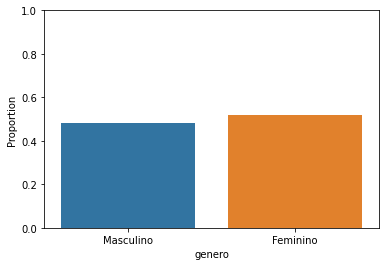

In [30]:
# Gênero 

grafico_barras_prop(db_treated, variable = "genero", values = [1,2], label = ["Masculino", "Feminino"])

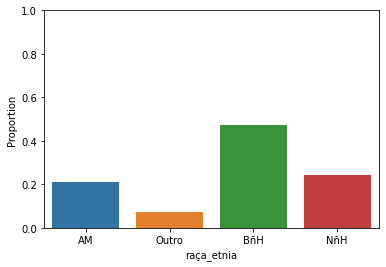

In [35]:
# Raça ou Etnia

# 1 Americano Mexicano- AM
# 2 Outro Hispânico/Multiracial - Outro
# 3 Branco não Hispânico - BnH
# 4 Negro não Hispânico- NnH

grafico_barras_prop(db_treated, 
                    variable = "raça_etnia", 
                    values = [1,2,3,4], 
                    label = ["AM", "Outro", "BñH", "NñH"])

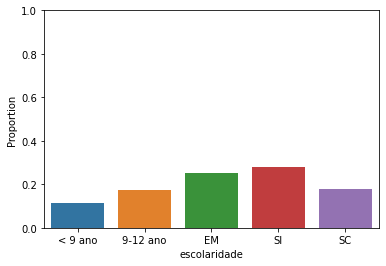

In [32]:
# Escolaridade

# < 9 ano -> até 9 ano
# entre 9 e 12 ano
# Ensino Médio -> EM
# Superior Incompleto -> SI
#Superior Completo -> SC

grafico_barras_prop(db_treated, 
                    variable = "escolaridade", 
                    values = [1,2,3,4,5], 
                    label = ["< 9 ano", "9-12 ano", "EM", "SI", "SC"])

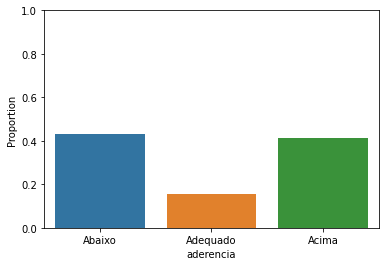

In [36]:
# Índice de aderência ao programa de aeróbico

grafico_barras_prop(db_treated, 
                    variable = "aderencia", 
                    values = [1,2,3], 
                    label = ["Abaixo", "Adequado", "Acima"])

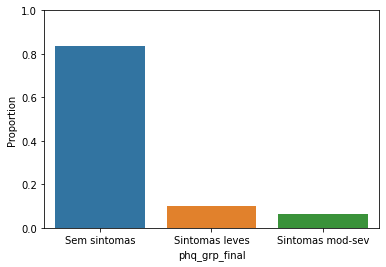

In [37]:
# Sintomas de depressão

grafico_barras_prop(db_treated, 
                    variable = "phq_grp_final", 
                    values = [0,1,2], 
                    label = ["Sem sintomas", "Sintomas leves", "Sintomas mod-sev"])

In [38]:
# Visualizando cada grupo de variaveis quantitativas separadamente

from IPython.display import display

for var in var_quant:
    display(db_treated[['phq_grp_final', var]].groupby('phq_grp_final').describe().round(2))

idade                                            
                count   mean    std   min   25%   50%   75%   max
phq_grp_final                                                    
0.0            4013.0  44.94  19.99  18.0  27.0  42.0  62.0  85.0
1.0             489.0  43.70  19.67  18.0  26.0  41.0  59.0  85.0
2.0             297.0  44.18  17.56  18.0  29.0  45.0  56.0  85.0

renda_familiar_anual                                       \
                             count      mean       std     min      25%   
phq_grp_final                                                             
0.0                         3923.0  42618.15  24274.99  2499.5  22499.5   
1.0                          466.0  37081.12  23423.22  2499.5  17499.5   
2.0                          291.0  29080.31  22825.18  2499.5  12499.5   

                                          
                   50%      75%      max  
phq_grp_final                             
0.0            39999.5  69999.5  75000.0  
1.0            29999.5  55000.0  75000.0  
2.0            22499.5  39999.5  75000.0

aerobico_min                                              \
                     count    mean     std  min    25%     50%     75%   
phq_grp_final                                                            
0.0                 4013.0  500.90  795.56  0.0  55.43  235.57  618.94   
1.0                  489.0  474.40  889.21  0.0  30.00  192.42  479.54   
2.0                  297.0  294.08  612.61  0.0   0.00   90.07  323.33   

                         
                    max  
phq_grp_final            
0.0            10777.83  
1.0             7302.54  
2.0             5536.15

vegetais_total                                        
                       count  mean   std  min   25%   50%   75%  max
phq_grp_final                                                       
0.0                   3942.0  3.23  1.45  0.0  2.09  3.24  4.84  5.0
1.0                    474.0  3.11  1.53  0.0  1.93  3.15  4.76  5.0
2.0                    288.0  3.05  1.49  0.0  1.92  3.08  4.36  5.0

verduras_verde_escuras_leguminosas                              \
                                           count  mean   std  min  25%   50%   
phq_grp_final                                                                  
0.0                                       3942.0  1.82  2.14  0.0  0.0  0.14   
1.0                                        474.0  1.77  2.12  0.0  0.0  0.11   
2.0                                        288.0  1.55  2.07  0.0  0.0  0.00   

                          
                75%  max  
phq_grp_final             
0.0            4.49  5.0  
1.0            4.21  5.0  
2.0            3.61  5.0

frutais_total                                        
                      count  mean   std  min   25%   50%   75%  max
phq_grp_final                                                      
0.0                  3942.0  2.53  1.95  0.0  0.47  2.39  5.00  5.0
1.0                   474.0  2.31  1.90  0.0  0.41  2.00  4.36  5.0
2.0                   288.0  2.23  1.97  0.0  0.08  1.96  4.32  5.0

frutas_in_natura                                       
                         count  mean   std  min  25%   50%   75%  max
phq_grp_final                                                        
0.0                     3942.0  2.40  2.17  0.0  0.0  2.18  5.00  5.0
1.0                      474.0  2.19  2.16  0.0  0.0  1.36  5.00  5.0
2.0                      288.0  2.05  2.12  0.0  0.0  1.18  4.89  5.0

graos_integrais                                       
                        count  mean   std  min  25%   50%   75%  max
phq_grp_final                                                       
0.0                    3942.0  1.80  1.93  0.0  0.0  1.06  3.52  5.0
1.0                     474.0  1.66  1.82  0.0  0.0  1.04  3.00  5.0
2.0                     288.0  1.47  1.81  0.0  0.0  0.40  2.91  5.0

laticinios                                       
                   count  mean   std  min   25%   50%  75%  max
phq_grp_final                                                  
0.0               3942.0  3.78  1.59  0.0  2.64  4.98  5.0  5.0
1.0                474.0  3.75  1.63  0.0  2.65  4.95  5.0  5.0
2.0                288.0  3.71  1.60  0.0  2.54  4.66  5.0  5.0

proteinas_total                                      
                        count  mean   std  min   25%  50%  75%  max
phq_grp_final                                                      
0.0                    3942.0  4.45  0.99  0.0  4.21  5.0  5.0  5.0
1.0                     474.0  4.35  1.08  0.0  3.98  5.0  5.0  5.0
2.0                     288.0  4.35  1.12  0.0  4.00  5.0  5.0  5.0

proteinas_vegetais                                       
                           count  mean   std  min   25%   50%  75%  max
phq_grp_final                                                          
0.0                       3942.0  2.61  2.17  0.0  0.03  2.63  5.0  5.0
1.0                        474.0  2.52  2.14  0.0  0.00  2.44  5.0  5.0
2.0                        288.0  2.30  2.15  0.0  0.00  1.91  5.0  5.0

acido_graxo                                         
                    count  mean   std  min   25%   50%   75%   max
phq_grp_final                                                     
0.0                3942.0  4.72  3.24  0.0  2.02  4.43  7.29  10.0
1.0                 474.0  4.73  3.19  0.0  2.08  4.55  7.08  10.0
2.0                 288.0  4.36  3.16  0.0  1.63  4.09  6.76  10.0

sodio                                         
                count  mean   std  min   25%   50%   75%   max
phq_grp_final                                                 
0.0            3942.0  4.69  3.40  0.0  1.49  4.76  7.53  10.0
1.0             474.0  4.96  3.45  0.0  1.75  5.08  7.89  10.0
2.0             288.0  5.20  3.47  0.0  2.60  5.14  8.43  10.0

graos_refinados                                         
                        count  mean   std  min   25%   50%   75%   max
phq_grp_final                                                         
0.0                    3942.0  5.80  3.46  0.0  2.97  6.19  9.19  10.0
1.0                     474.0  5.74  3.62  0.0  2.76  6.23  9.53  10.0
2.0                     288.0  6.09  3.52  0.0  3.34  6.85  9.58  10.0

gordura_saturada                                         
                         count  mean   std  min   25%   50%   75%   max
phq_grp_final                                                          
0.0                     3942.0  6.05  3.17  0.0  3.70  6.36  8.97  10.0
1.0                      474.0  6.04  3.15  0.0  3.63  6.46  8.92  10.0
2.0                      288.0  5.78  3.31  0.0  2.92  6.38  8.66  10.0

açucar_adicional                                         
                         count  mean   std  min   25%   50%   75%   max
phq_grp_final                                                          
0.0                     3942.0  6.29  3.29  0.0  3.87  6.93  9.50  10.0
1.0                      474.0  5.93  3.47  0.0  3.08  6.70  9.17  10.0
2.0                      288.0  5.45  3.65  0.0  2.19  5.67  9.16  10.0

escore_total                                                 
                     count   mean    std    min    25%    50%    75%    max
phq_grp_final                                                              
0.0                 3942.0  50.17  12.46  16.06  41.09  49.81  58.42  89.53
1.0                  474.0  49.07  11.66  16.49  40.94  48.39  56.99  81.52
2.0                  288.0  47.59  11.50  21.63  39.11  46.50  55.95  83.30

## 2.1) EDA: Análise Bivariada

In [39]:
# Analisando grupos de variaveis "Idade ,"Renda Anual Familiar,"Atividade Física (min/semana) e Gênero

# Função para construir boxplot

def grafico_boxplot_grp(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(x="phq_grp_final", y=variable, data=data.replace({'phq_grp_final': {0: "Sem sintomas", 
                                                                          1: "Sintomas leves",
                                                                          2: "Sintomas mod-graves"}}))
    plt.ylabel(label)
    plt.show()
    

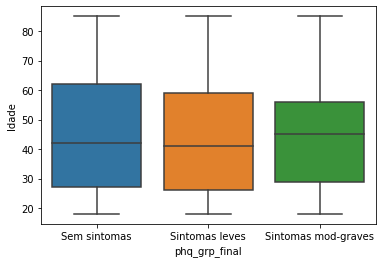

In [40]:
# Boxplot Idade x Sintomas depressão

grafico_boxplot_grp(db_treated, "idade", "Idade")

### Observações

*   Correlação entre idade e sintomas moderados a severos
*   A partir dos 40 anos os sintomas parecem ser mais graves 



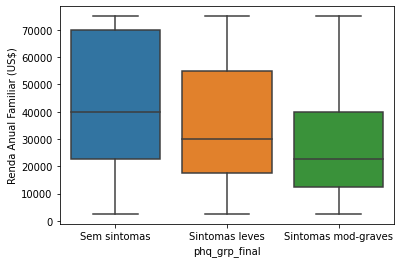

In [41]:
# Renda Familiar Anual X Sintomas depressão

grafico_boxplot_grp(db_treated, "renda_familiar_anual", "Renda Anual Familiar (US$)")

### Observações

*  Distribuição dos dados indica uma alta correlação entre baixa renda familiar e sintomas de depressão severa

*   Renda familiar até 4.000 dolares anuais tem maior incidência de sintomas moderados e severos



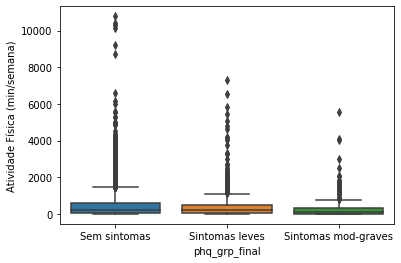

In [42]:
# Atividade aeróbica semanal X Sintomas de depressão

grafico_boxplot_grp(db_treated, "aerobico_min", "Atividade Física (min/semana)")

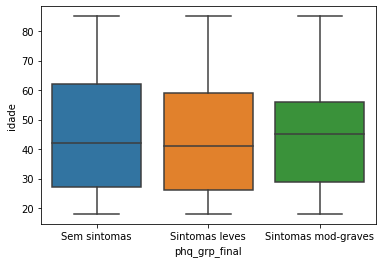

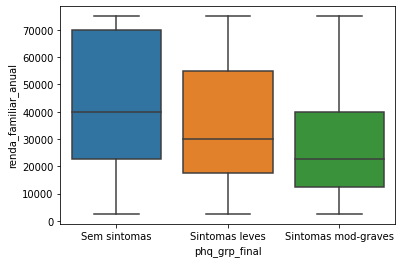

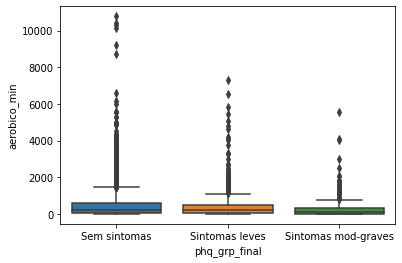

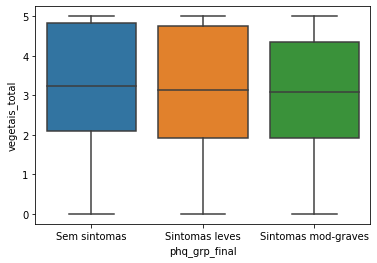

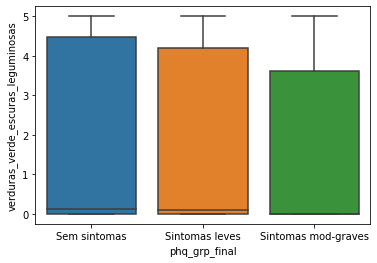

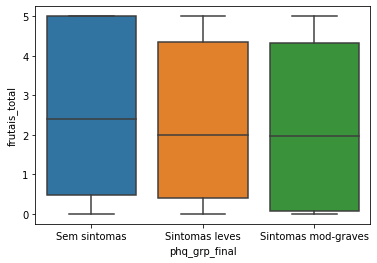

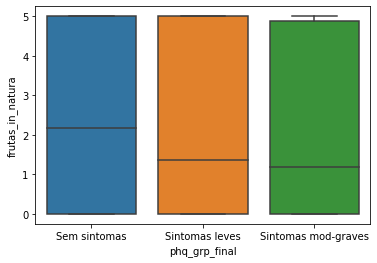

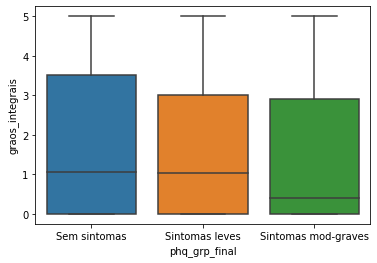

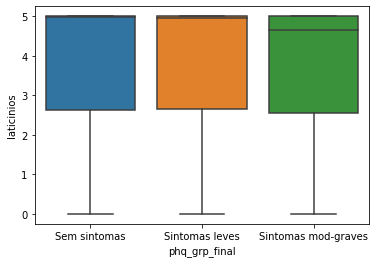

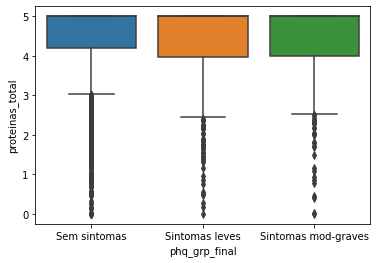

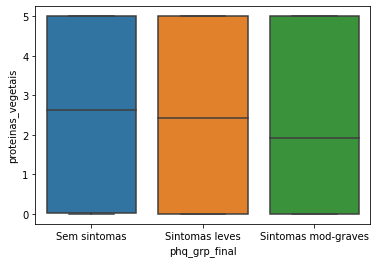

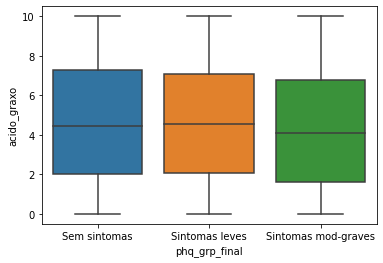

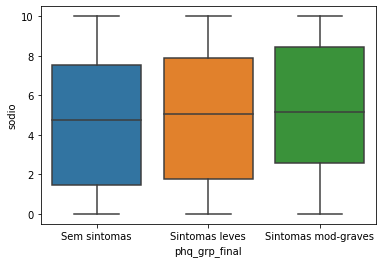

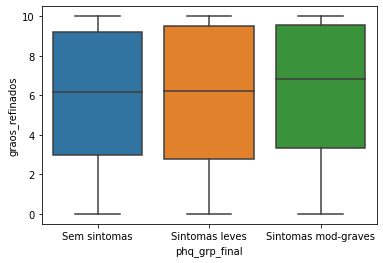

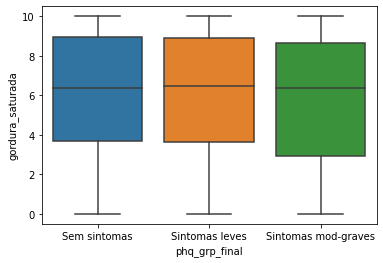

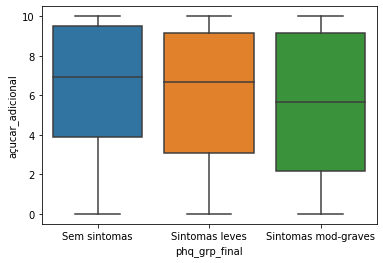

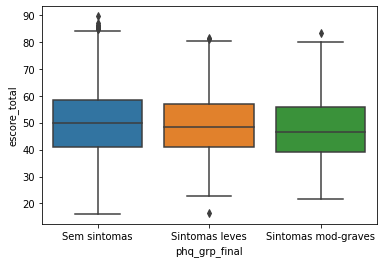

In [43]:
# Analisando as variáveis quantitativais

for var in var_quant:
    grafico_boxplot_grp(db_treated, var, "")

### Observações:
Resumo das principais conclusões

*   Os hábitos alimentares parecem ter impacto nos sintomas de depressão: indivíduos com baixo consumo de Grão integrais e Verduras verde escuras na dieta mostra sintomas mais severos;
*   Atividade aeróbica parece ter impacto positivo nos sintomas de depressão;
*   Indivíduos acima de 40 anos têm mais sintomas moderados e severos;
*   Indivíduos com Renda familiar anual abaixo de 4.000 dólares têm mais sintomas severos.  

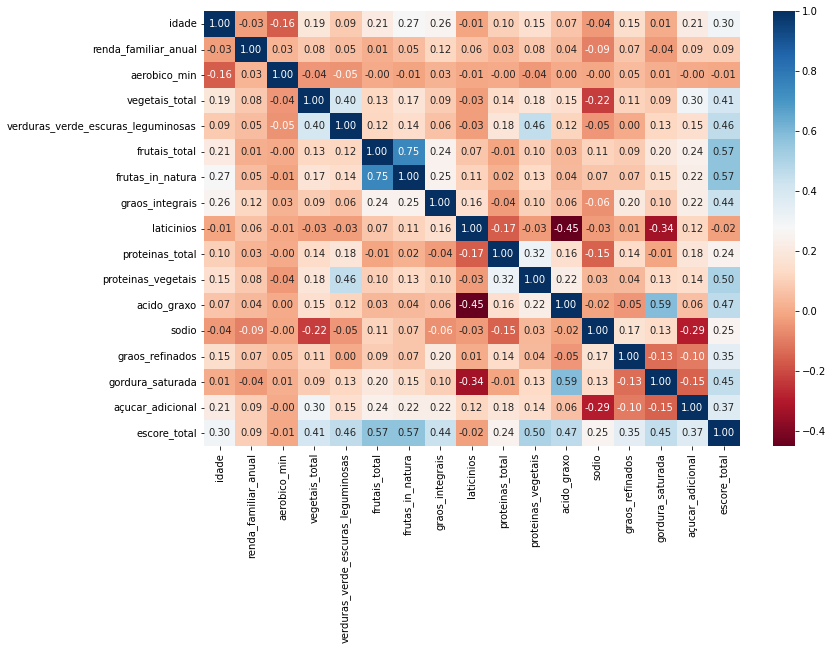

In [44]:
# Analisando correlaçoes entre todas as variaveis da var_quant

sns.set_context(font_scale = 2.0)
plt.figure(figsize = (12,8))
sns.heatmap(
    db_treated[var_quant].corr(), 
    annot = True, 
    fmt = ".2f",
    cmap = "RdBu", 
)

plt.show()

## 3) Teste de Hipóteses

### * H0: Não existe relação entre hábitos saudáveis e sintomas de depressão

### * Ha: Existe alguma relação entre hábitos saudáveis e sintomas de depressão

In [46]:
# ANOVA teste F
# p< 0.05

# Alimentação x sintomas de depressão

db_test = db_treated.notnull()

stat, p = f_oneway(db_test[db_test['phq_grp_final'] == 0 & db_test['escore_total']]["escore_total"],
                   db_test[db_test['phq_grp_final'] == 1 & db_test['escore_total']]["escore_total"],
                   db_test[db_test['phq_grp_final'] == 2 & db_test['escore_total']]["escore_total"])

print(f"Results of ANOVA test:\n The F-statistic is: {stat}\n The p-value is: {p}")

Results of ANOVA test:
 The F-statistic is: 564.344840752387
 The p-value is: 3.785933583228139e-225


### Observação

* p<0,05(Rejeita H0): <b>há relação entre a alimentação e os sintomas de depressão</b>

In [48]:
# Teste de multiplo de Tukey - alimentação saudável x sintomas de depressão

# Teste 1 = Comparação das médias de escore_total do grupo sem sintomas x Grupo com sintomas leves
# Teste 2 = Comparação das médias de escore_total do grupo sem sintomas X Grupo com sintomas moderados a severos
# Teste 3 = Comparação das médias de escore_total do grupo com sintomas leves x Grupo com sintomas moderados a severos

df_tukey = db_treated.dropna() # deletando valors nulos
tukey = pairwise_tukeyhsd(df_tukey['escore_total'],
                  df_tukey['phq_grp_final'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0  -1.2916 0.0888 -2.7299  0.1467  False
   0.0    2.0   -2.726  0.001  -4.506 -0.9461   True
   1.0    2.0  -1.4344 0.2749 -3.6262  0.7573  False
----------------------------------------------------


### Observações

* Existe diferença estatística entre escore total(alimentação saudável) e o grupo sem sintomas(0.0) comparado grupo com sintomas moderados a severos(2.0) - H0 rejeitada
* As outras comparações falharam em rejeitar H0

In [49]:
# Teste de multiplo de Tukey - renda familiar anual x sintomas de depressão

tukey = pairwise_tukeyhsd(df_tukey['renda_familiar_anual'],
                  df_tukey['phq_grp_final'],
                  alpha = 0.05)

print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2   meandiff  p-adj    lower      upper    reject
-------------------------------------------------------------
   0.0    1.0   -5440.655   0.0  -8255.6909 -2625.6192   True
   0.0    2.0 -13377.1642   0.0 -16860.8851 -9893.4433   True
   1.0    2.0  -7936.5091   0.0 -12226.2555 -3646.7628   True
-------------------------------------------------------------


### Observação

* Existe diferença estatística entre as médias dos grupos renda_familiar_anual em relação grupos de sintomas de depressão (H0 rejeitada)

In [51]:
# Teste de multiplo de Tukey - raça/etnia x sintomas de depressão

tukey = pairwise_tukeyhsd(df_tukey['raça_etnia'],
                  df_tukey['phq_grp_final'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0  -0.0288 0.8411 -0.1494 0.0917  False
   0.0    2.0   0.0708 0.5067 -0.0784   0.22  False
   1.0    2.0   0.0996 0.4118 -0.0841 0.2833  False
---------------------------------------------------


### Observação
* As hipóteses nulas não foram rejeitadas, ou seja, não existe diferença estatística entre médias do grupo raça/etnia e os grupos com diferentes sintomas de depressão

In [57]:
# Teste de multiplo de Tukey - atividade aerobica x sintomas de depressão

tukey = pairwise_tukeyhsd(df_tukey['aerobico_min'],
                  df_tukey['phq_grp_final'],
                  alpha = 0.05)

print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
   0.0    1.0  -18.1974 0.8915 -111.6387  75.2439  False
   0.0    2.0 -204.1262 0.0001 -319.7636 -88.4888   True
   1.0    2.0 -185.9288 0.0063 -328.3212 -43.5365   True
--------------------------------------------------------


### Observações

* Falhou em rejeitar H0 nos grupos sem sintomas e com sintomas leves

In [58]:
# Teste de multiplo de Tukey - Genero x sintomas de depressão

tukey = pairwise_tukeyhsd(df_tukey['genero'],
                  df_tukey['phq_grp_final'],
                  alpha = 0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   0.0    1.0   0.1132    0.0   0.055 0.1713   True
   0.0    2.0   0.0891 0.0104  0.0171  0.161   True
   1.0    2.0  -0.0241 0.7996 -0.1127 0.0645  False
---------------------------------------------------


### Observações
* Falhou em rejeitar H0 nos grupos com sintomas leves e com sintomas moderados a severos

### Observações finais

* Analisando todos os resultados do estudo, é possivel confirmar que os grupos mais efetados por sintomas depressão são mulheres, pessoas de baixa renda e com idade mais avançada.
* Pode haver relação entre alimentação e sintomas de depressão mais severos
* Para uma análise mais robusta seria necessário ter mais dados ou ter mais variáveis como doenças crônicas, histórico familiar, etc